In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500)
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    0    1    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    0   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    0    0    0    0    0    1    0    0    0    1    0   
2    1    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
3    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
4    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   

   X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  \
0    0    0    1    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0   
2    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
3    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
4    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   

   X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  \
0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
1    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
2    0    0    0    1    0    0    1    0    0    0    1    0    0    1    0   
3    0    0    0    0    0    0    1    0    0    0    0    0    0    1    0   
4    0    0    0    1    0    0    1    0    0    0    0    0    0    1    0   

   X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  \
0    0    0    0    0    0    1    0    1    0    0    1    0    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    1    0    0    0    0   
2    0    0    0    0    0    1    0    1    1    0    1    1    1    0    0   
3    0    0    0    0    0    0    0    1    1    0    1    0    1    0    0   
4    0    0    0    0    0    0    0    1    0    0    1    0    1    0    0   

   X79  X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  \
0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
1    0    1    0    0    0    0    1    0    0    0    0    0    0    0    0   
2    0    1    0    0    0    1    1    0    0    0    0    0    0    0    0   
3    0    1    0    0    0    1    0    0    0    0    0    0    0    0    0   
4    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X94  X95  X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  \
0    0    0    0    0    0    0     0     0     0     0     0     0     0   
1    0    0    1    0    1    0     1     1     0     0     0     0     0   
2    0    0    1    0    1    0     0     1     0     0     0     0     0   
3    0    0    1    0    1    0     0     1     0     0     0     0     0   
4    0    0    1    0    1    0     0     1     0     0     0     0     0   

   X107  X108  X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  \
0     0     0     0     0     1     0     0     1     0     1     0     1   
1     0     0     0     0     1     0     0     0     0     0     0     1   
2     0     0     0     0     1     0     0     0     0     0     0     0   
3     0     1     0     0     1     0     0     1     0     0     0     0   
4     0     1     0     0     1     0     0     1     0     0     0     0   

   X119  X120  X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  \
0     1     1     0     0     0     0     0     0     1     0     0     1   
1     1     1     0     0     0     0     0     1

#### My Function

In [3]:
def infotable(x):
    return pd.DataFrame(columns='dataFeatures dataType null nullPct unique uniqueSample'.split(),
                        data=[[col, 
                               x.dtypes[col], 
                               sum(x[col].isna()),
                               round(100*sum(x[col].isna())/len(x[col]),2), 
                               x[col].nunique(),list(x[col].unique()[:5])]
                              for col in x.columns])       

def variabletypes(dataType, unique):
    if 'object' == dataType:
        return 'Categorical'
    elif ('int'in str(dataType)) & (unique == 2):
        return 'Binary'
    else :
        return 'Numerical'

def stripplot(varcol ,data=df ,n=14):
    plt.figure(figsize=(12,6))
    sns.stripplot(x=varcol,y='y',data=data,jitter=True,palette='Set2',order=np.sort(df[varcol].unique()))
    plt.xlabel(varcol,fontsize=n)
    plt.ylabel('y',fontsize=n)
    plt.title('Distribution of y variable with '+str(varcol),fontsize=n+2)
    plt.show()


In [4]:
dfDescribe= infotable(df)
pd.options.display.max_rows = len(dfDescribe)
dfDescribe

dataFeatures dataType  null  nullPct  unique  \
0             ID    int64     0      0.0    4209   
1              y  float64     0      0.0    2545   
2             X0   object     0      0.0      47   
3             X1   object     0      0.0      27   
4             X2   object     0      0.0      44   
5             X3   object     0      0.0       7   
6             X4   object     0      0.0       4   
7             X5   object     0      0.0      29   
8             X6   object     0      0.0      12   
9             X8   object     0      0.0      25   
10           X10    int64     0      0.0       2   
11           X11    int64     0      0.0       1   
12           X12    int64     0      0.0       2   
13           X13    int64     0      0.0       2   
14           X14    int64     0      0.0       2   
15           X15    int64     0      0.0       2   
16           X16    int64     0      0.0       2   
17           X17    int64     0      0.0       2   
18           X18    int64     0      0.0       2   
19           X19    int64     0      0.0       2   
20           X20    int64     0      0.0       2   
21           X21    int64     0      0.0       2   
22           X22    int64     0      0.0       2   
23           X23    int64     0      0.0       2   
24           X24    int64     0      0.0       2   
25           X26    int64     0      0.0       2   
26           X27    int64     0      0.0       2   
27           X28    int64     0      0.0       2   
28           X29    int64     0      0.0       2   
29           X30    int64     0      0.0       2   
30           X31    int64     0      0.0       2   
31           X32    int64     0      0.0       2   
32           X33    int64     0      0.0       2   
33           X34    int64     0      0.0       2   
34           X35    int64     0      0.0       2   
35           X36    int64     0      0.0       2   
36           X37    int64     0      0.0       2   
37           X38    int64     0      0.0       2   
38           X39    int64     0      0.0       2   
39           X40    int64     0      0.0       2   
40           X41    int64     0      0.0       2   
41           X42    int64     0      0.0       2   
42           X43    int64     0      0.0       2   
43           X44    int64     0      0.0       2   
44           X45    int64     0      0.0       2   
45           X46    int64     0      0.0       2   
46           X47    int64     0      0.0       2   
47           X48    int64     0      0.0       2   
48           X49    int64     0      0.0       2   
49           X50    int64     0      0.0       2   
50           X51    int64     0      0.0       2   
51           X52    int64     0      0.0       2   
52           X53    int64     0      0.0       2   
53           X54    int64     0      0.0       2   
54           X55    int64     0      0.0       2   
55           X56    int64     0      0.0       2   
56           X57    int64     0      0.0       2   
57           X58    int64     0      0.0       2   
58           X59    int64     0      0.0       2   
59           X60    int64     0      0.0       2   
60           X61    int64     0      0.0       2   
61           X62    int64     0      0.0       2   
62           X63    int64     0      0.0       2   
63           X64    int64     0      0.0       2   
64           X65    int64     0      0.0       2   
65           X66    int64     0      0.0       2   
66           X67    int64     0      0.0       2   
67           X68    int64     0      0.0       2   
68           X69    int64     0      0.0       2   
69           X70    int64     0      0.0       2   
70           X71    int64     0      0.0       2   
71           X73    int64     0      0.0       2   
72           X74    int64     0      0.0       2   
73           X75    int64     0      0.0       2   
74           X76    int64     0      0.0       2   
75           X77    int64     0      0.0       2   


In [5]:
print('There are ',len(dfDescribe[dfDescribe['unique']==1]['dataFeatures'].values), ' columns with only one nunique and those are ',dfDescribe[dfDescribe['unique']==1]['dataFeatures'].values)

There are  12  columns with only one nunique and those are  ['X11' 'X93' 'X107' 'X233' 'X235' 'X268' 'X289' 'X290' 'X293' 'X297'
 'X330' 'X347']


In [6]:
data=df.drop(dfDescribe[dfDescribe['unique']==1]['dataFeatures'].values,axis=1)

In [7]:
dataDescribe = infotable(data)
dataDescribe['Variable type']=dataDescribe.apply(lambda row: variabletypes(row['dataType'], row['unique']),axis=1)
dataDescribe

dataFeatures dataType  null  nullPct  unique  \
0             ID    int64     0      0.0    4209   
1              y  float64     0      0.0    2545   
2             X0   object     0      0.0      47   
3             X1   object     0      0.0      27   
4             X2   object     0      0.0      44   
5             X3   object     0      0.0       7   
6             X4   object     0      0.0       4   
7             X5   object     0      0.0      29   
8             X6   object     0      0.0      12   
9             X8   object     0      0.0      25   
10           X10    int64     0      0.0       2   
11           X12    int64     0      0.0       2   
12           X13    int64     0      0.0       2   
13           X14    int64     0      0.0       2   
14           X15    int64     0      0.0       2   
15           X16    int64     0      0.0       2   
16           X17    int64     0      0.0       2   
17           X18    int64     0      0.0       2   
18           X19    int64     0      0.0       2   
19           X20    int64     0      0.0       2   
20           X21    int64     0      0.0       2   
21           X22    int64     0      0.0       2   
22           X23    int64     0      0.0       2   
23           X24    int64     0      0.0       2   
24           X26    int64     0      0.0       2   
25           X27    int64     0      0.0       2   
26           X28    int64     0      0.0       2   
27           X29    int64     0      0.0       2   
28           X30    int64     0      0.0       2   
29           X31    int64     0      0.0       2   
30           X32    int64     0      0.0       2   
31           X33    int64     0      0.0       2   
32           X34    int64     0      0.0       2   
33           X35    int64     0      0.0       2   
34           X36    int64     0      0.0       2   
35           X37    int64     0      0.0       2   
36           X38    int64     0      0.0       2   
37           X39    int64     0      0.0       2   
38           X40    int64     0      0.0       2   
39           X41    int64     0      0.0       2   
40           X42    int64     0      0.0       2   
41           X43    int64     0      0.0       2   
42           X44    int64     0      0.0       2   
43           X45    int64     0      0.0       2   
44           X46    int64     0      0.0       2   
45           X47    int64     0      0.0       2   
46           X48    int64     0      0.0       2   
47           X49    int64     0      0.0       2   
48           X50    int64     0      0.0       2   
49           X51    int64     0      0.0       2   
50           X52    int64     0      0.0       2   
51           X53    int64     0      0.0       2   
52           X54    int64     0      0.0       2   
53           X55    int64     0      0.0       2   
54           X56    int64     0      0.0       2   
55           X57    int64     0      0.0       2   
56           X58    int64     0      0.0       2   
57           X59    int64     0      0.0       2   
58           X60    int64     0      0.0       2   
59           X61    int64     0      0.0       2   
60           X62    int64     0      0.0       2   
61           X63    int64     0      0.0       2   
62           X64    int64     0      0.0       2   
63           X65    int64     0      0.0       2   
64           X66    int64     0      0.0       2   
65           X67    int64     0      0.0       2   
66           X68    int64     0      0.0       2   
67           X69    int64     0      0.0       2   
68           X70    int64     0      0.0       2   
69           X71    int64     0      0.0       2   
70           X73    int64     0      0.0       2   
71           X74    int64     0      0.0       2   
72           X75    int64     0      0.0       2   
73           X76    int64     0      0.0       2   
74           X77    int64     0      0.0       2   
75           X78    int64     0      0.0       2   


In [8]:
for x in dataDescribe['Variable type'].unique():
    print (str(sum(dataDescribe['Variable type']==x)).rjust(3),x.rjust(14),'\t: ',dataDescribe[dataDescribe['Variable type']==x]['dataFeatures'].values[:3])

  2      Numerical 	:  ['ID' 'y']
  8    Categorical 	:  ['X0' 'X1' 'X2']
356         Binary 	:  ['X10' 'X12' 'X13']


C:\Users\rizqi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


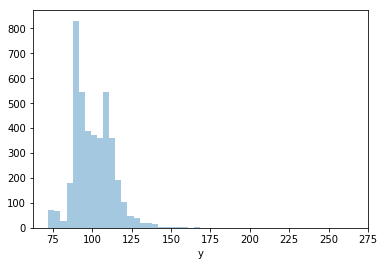

In [9]:
sns.distplot(data['y'],kde=False,bins=50)

finding outliers

In [10]:
mean=data['y'].describe().loc['mean']
std=data['y'].describe().loc['std']
for n in range(1,4):
    print('there are ' + str(len(data)-sum((data['y']<(mean+(n*std)))&(data['y']>(mean-(n*std))))) +' ('+str(n)+'*std) outliers')

there are 969 (1*std) outliers
there are 175 (2*std) outliers
there are 40 (3*std) outliers


Let's try to drop 3*std outliers

In [11]:
# n=3
# data=data[(data['y']<(mean+(n*std)))&(data['y']>(mean-(n*std)))]

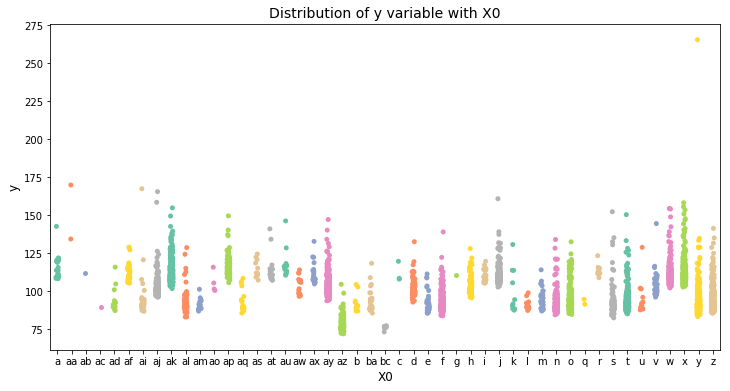

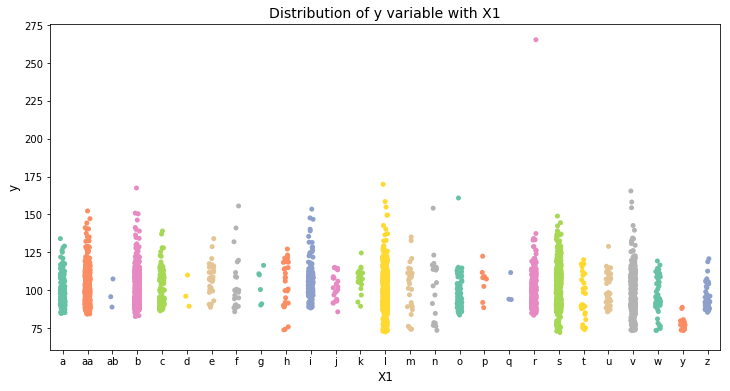

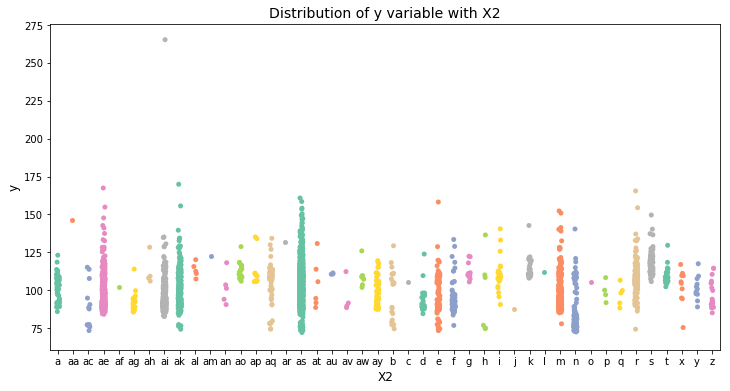

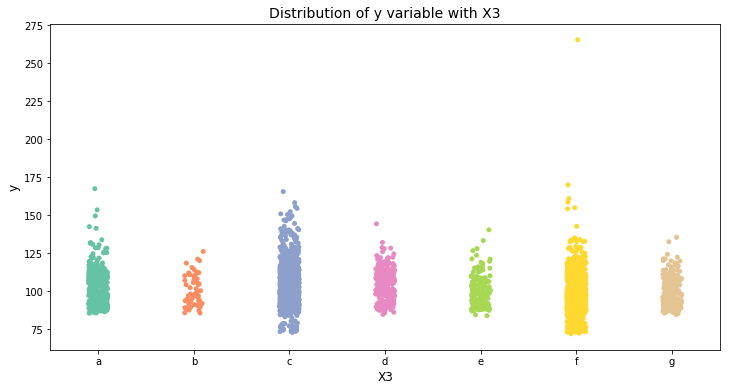

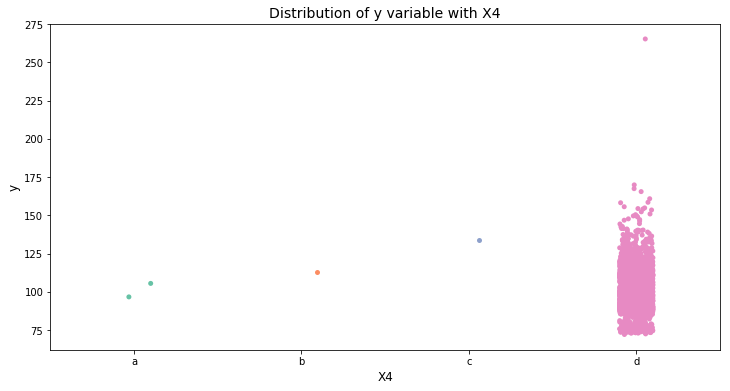

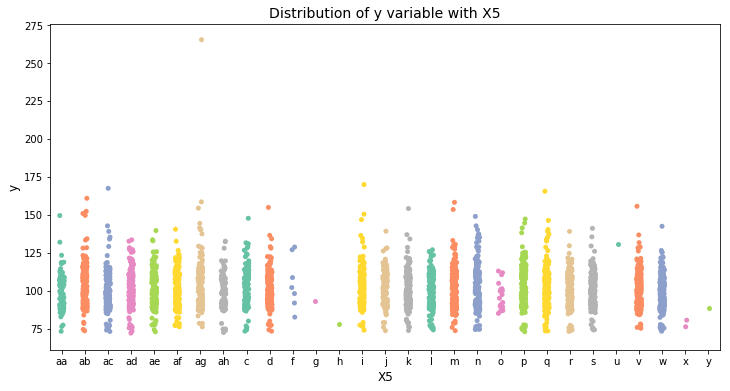

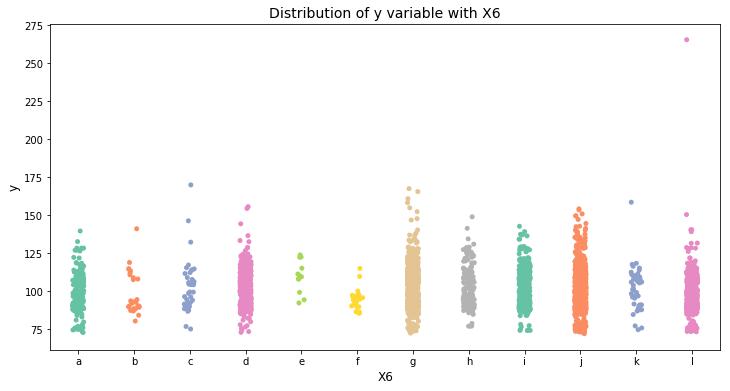

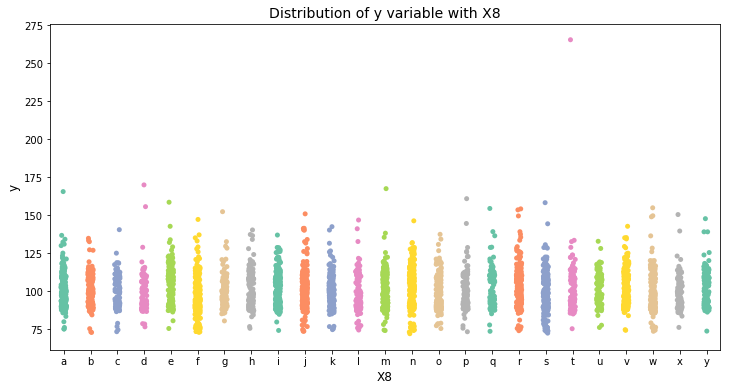

In [12]:
for x in dataDescribe[dataDescribe['Variable type']=='Categorical']['dataFeatures']:
    stripplot(x,n=12)

Some categorical variables have more than 10 categories

In [13]:
X=data.drop('y',axis=1)
y=data.iloc[:,1:2]

In [14]:
X.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  X18  X19  \
0   0   k  v  at  a  d  u  j  o    0    0    1    0    0    0    0    1    0   
1   6   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0    1    0   
2   7  az  w   n  c  d  x  j  x    0    0    0    0    0    0    1    0    0   
3   9  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0    0    0   
4  13  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0    0    0   

   X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  \
0    0    1    0    0    0    0    0    0    0    0    1    0    0    0    1   
1    0    0    0    0    0    0    1    0    0    0    1    0    0    0    1   
2    0    0    0    0    0    0    1    1    1    0    1    0    0    0    1   
3    0    0    0    0    0    0    1    1    1    0    1    0    0    0    1   
4    0    0    0    0    0    0    1    1    1    0    1    0    0    0    1   

   X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  \
0    0    1    0    0    0    0    0    0    0    0    1    0    0    0    0   
1    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    0    0    0    0    1    0    0    1    0    0    0    0   
3    0    1    0    0    0    0    0    1    0    0    1    0    0    0    0   
4    0    1    0    0    0    0    0    1    0    0    1    0    0    0    0   

   X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  \
0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
1    1    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
2    1    0    0    1    0    0    0    1    0    0    1    0    0    0    0   
3    0    0    0    1    0    0    0    0    0    0    1    0    0    0    0   
4    1    0    0    1    0    0    0    0    0    0    1    0    0    0    0   

   X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  X81  \
0    0    0    1    0    1    0    0    1    0    0    0    0    0    0    0   
1    0    0    0    0    1    0    0    1    0    0    0    0    0    1    0   
2    0    0    1    0    1    1    0    1    1    1    0    0    0    1    0   
3    0    0    0    0    1    1    0    1    0    1    0    0    0    1    0   
4    0    0    0    0    1    0    0    1    0    1    0    0    0    1    0   

   X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  X97  \
0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
2    0    0    1    1    0    0    0    0    0    0    0    0    0    1    0   
3    0    0    1    0    0    0    0    0    0    0    0    0    0    1    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0   

   X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  X111  \
0    0    0     0     0     0     0     0     0     0     0     0     0     1   
1    1    0     1     1     0     0     0     0     0     0     0     0     1   
2    1    0     0     1     0     0     0     0     0     0     0     0     1   
3    1    0     0     1     0     0     0     0     0     1     0     0     1   
4    1    0     0     1     0     0     0     0     0     1     0     0     1   

   X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  X124  \
0     0     0     1     0     1     0     1     1     1     0     0     0   
1     0     0     0     0     0     0     1     1     1     0     0     0   
2     0     0     0     0     0     0     0     0     1     0     0     0   
3     0     0     1     0     0     0     0     0     1     0     0     0   
4     0     0     1     0     0     0     0     0     1     0     0     0   

   X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  X136  \
0     0     0     0     1     0     0     1     0     0     0     0     1   
1     0     0

In [15]:
import category_encoders as ce

In [16]:
cat_data = data.iloc[:,2:10].copy()
cat_data.head()

X0 X1  X2 X3 X4 X5 X6 X8
0   k  v  at  a  d  u  j  o
1   k  t  av  e  d  y  l  o
2  az  w   n  c  d  x  j  x
3  az  t   n  f  d  x  l  e
4  az  v   n  f  d  h  d  n

In [17]:
encoder = ce.BinaryEncoder(cols=list(cat_data.columns))
encoder

BinaryEncoder(cols=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       return_df=True, verbose=0)

In [18]:
X = encoder.fit_transform(X)

### XGBoost

In [19]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

In [21]:
XGBmodel = XGBRegressor(random_state=101)
XGBmodel

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=101,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [22]:
XGBmodel.fit(X_train,y_train)
trainpred=XGBmodel.predict(X_train)
predictions=XGBmodel.predict(X_test)

C:\Users\rizqi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


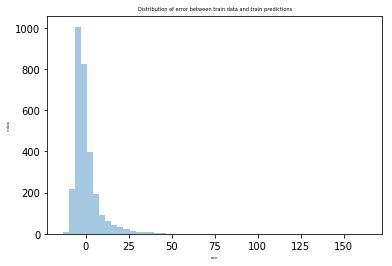

In [23]:
sns.distplot((y_train['y'].values-trainpred), bins=50, kde=False)
plt.xlabel('error',fontsize=n)
plt.ylabel('n data',fontsize=n)
plt.title('Distribution of error between train data and train predictions',fontsize=n+2)
plt.show()

C:\Users\rizqi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


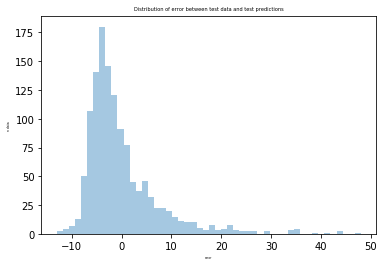

In [24]:
sns.distplot((y_test['y'].values-predictions), bins=50, kde=False)
plt.xlabel('error',fontsize=n)
plt.ylabel('n data',fontsize=n)
plt.title('Distribution of error between test data and test predictions',fontsize=n+2)
plt.show()

In [25]:
print('Train prediction \nR2 Score : ', r2_score(y_train, trainpred))
print('Test prediction \nR2 Score : ', r2_score(y_test, predictions))

Train prediction 
R2 Score :  0.6093362468724588
Test prediction 
R2 Score :  0.6326660511877805


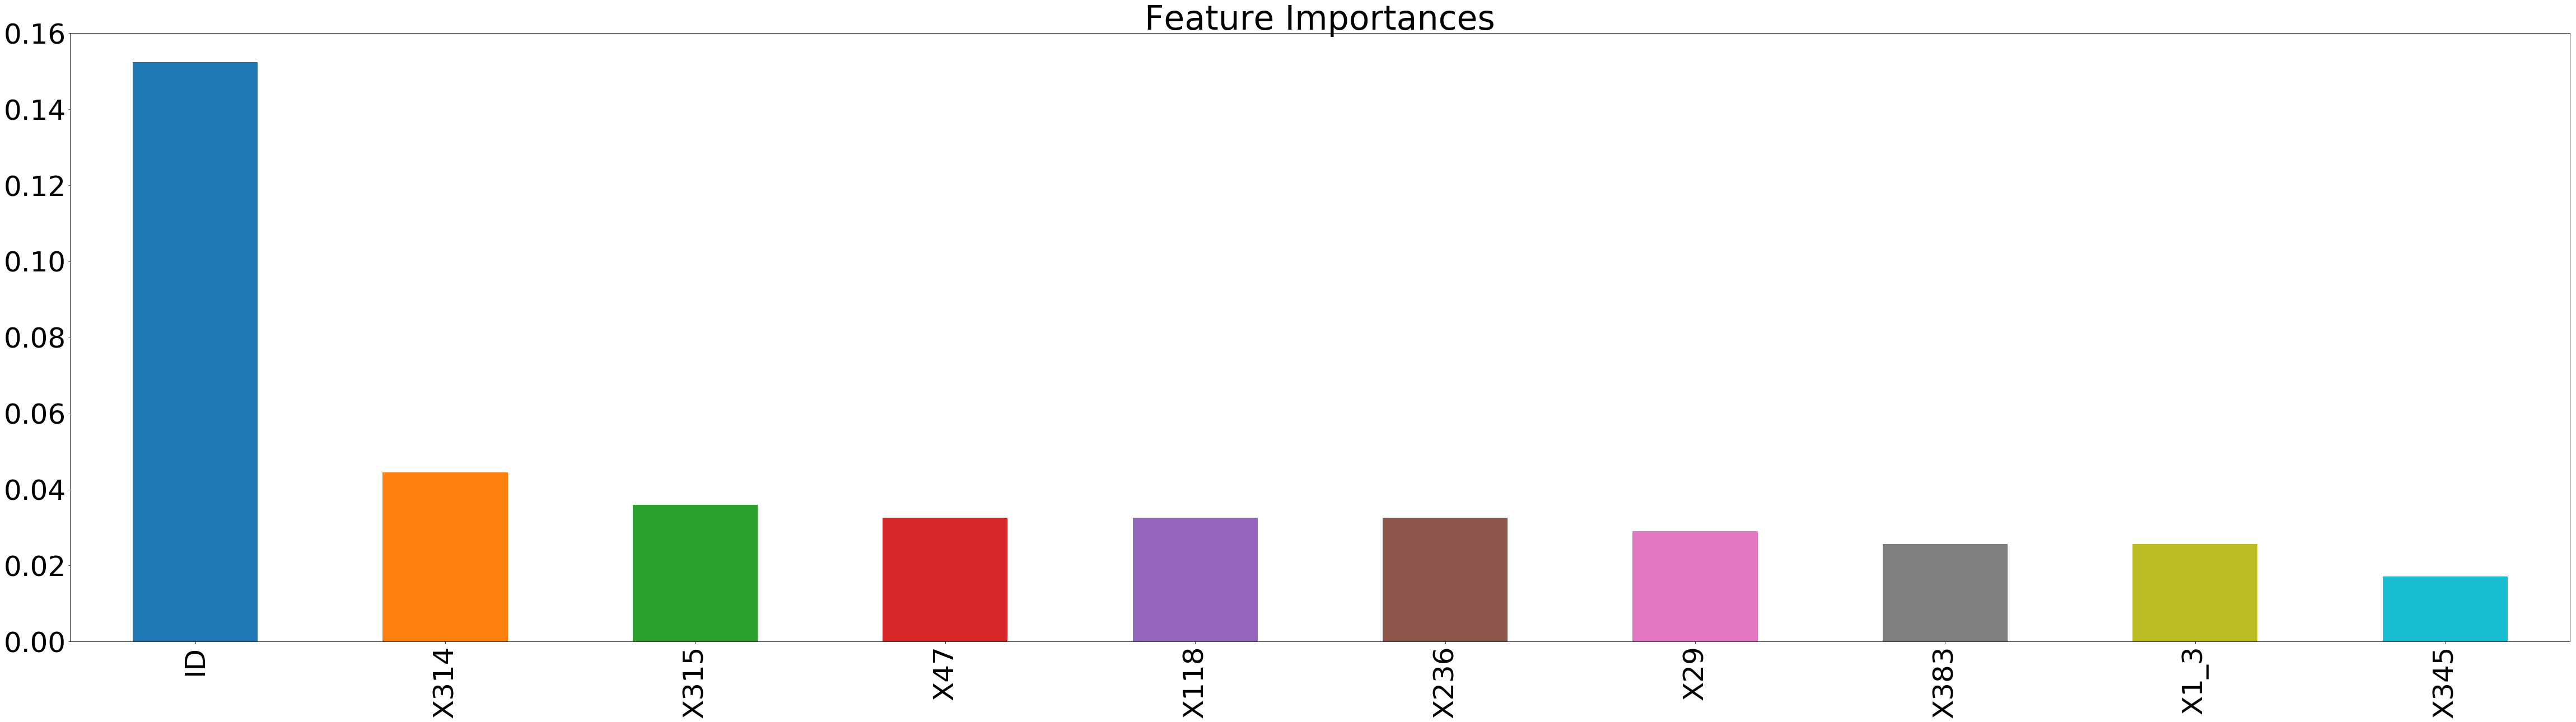

In [26]:
plt.figure(figsize=(80,20))
coef = pd.Series(XGBmodel.feature_importances_, X.columns).sort_values(ascending=False)
plt.rcParams.update({'font.size': 50})
coef[:10].plot(kind='bar',title='Feature Importances')

## Try Kaggle

In [27]:
test = pd.read_csv('test.csv')
test.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  X17  X18  \
0   1  az  v   n  f  d  t  a  w    0    0    0    0    0    0    0    0    0   
1   2   t  b  ai  a  d  b  g  y    0    0    0    0    0    0    0    0    0   
2   3  az  v  as  f  d  a  j  j    0    0    0    0    1    0    0    0    0   
3   4  az  l   n  f  d  z  l  n    0    0    0    0    0    0    0    0    0   
4   5   w  s  as  c  d  y  i  m    0    0    0    0    1    0    0    0    0   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
0    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
1    1    0    0    0    0    0    0    1    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    1    0    1    0    1    0    0    0   
3    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
4    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
0    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
1    1    0    1    0    0    0    0    0    0    0    1    1    0    0    1   
2    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
3    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
0    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
1    1    1    0    0    0    0    0    0    1    0    0    1    0    0    0   
2    0    1    0    0    1    0    0    0    1    0    0    1    0    0    0   
3    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
4    0    1    0    0    0    0    0    0    1    0    0    1    0    0    1   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
0    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   
2    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
3    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
4    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  X94  X95  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X107  X108  \
0    1    0    1    0     0     1     0     0     0     0     0     0     0   
1    0    0    1    0     0     1     0     1     0     0     0     0     0   
2    1    0    1    0     1     1     0     1     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     0     0   
4    1    0    1    0     1     1     0     1     0     0     1     0     0   

   X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  \
0     0     0     1     0     0     1     0     0     0     0     0     0   
1     0     0     1     0     0     0     0     1     0     1     1     1   
2     0     0     1     0     0     0     0     0     0     0     0     1   
3     0     0     1     0     0     1     0     0     0     0     0     1   
4     0     0     1     0     0     0     0     0     0     1     1     1   

   X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  \
0     0     0     0     0     0     0     1     0     0     0     1     0   
1     0     0     0     0

In [28]:
test=test.drop(dfDescribe[dfDescribe['unique']==1]['dataFeatures'].values,axis=1)

In [29]:
Xtest = encoder.fit_transform(test)
Xtest.head()

X0_0  X0_1  X0_2  X0_3  X0_4  X0_5  X0_6  X1_0  X1_1  X1_2  X1_3  X1_4  \
0     0     0     0     0     0     0     1     0     0     0     0     0   
1     0     0     0     0     0     1     0     0     0     0     0     1   
2     0     0     0     0     0     0     1     0     0     0     0     0   
3     0     0     0     0     0     0     1     0     0     0     0     1   
4     0     0     0     0     0     1     1     0     0     0     1     0   

   X1_5  X2_0  X2_1  X2_2  X2_3  X2_4  X2_5  X2_6  X3_0  X3_1  X3_2  X3_3  \
0     1     0     0     0     0     0     0     1     0     0     0     1   
1     0     0     0     0     0     0     1     0     0     0     1     0   
2     1     0     0     0     0     0     1     1     0     0     0     1   
3     1     0     0     0     0     0     0     1     0     0     0     1   
4     0     0     0     0     0     0     1     1     0     0     1     1   

   X4_0  X4_1  X4_2  X5_0  X5_1  X5_2  X5_3  X5_4  X5_5  X6_0  X6_1  X6_2  \
0     0     0     1     0     0     0     0     0     1     0     0     0   
1     0     0     1     0     0     0     0     1     0     0     0     0   
2     0     0     1     0     0     0     0     1     1     0     0     0   
3     0     0     1     0     0     0     1     0     0     0     0     1   
4     0     0     1     0     0     0     1     0     1     0     0     1   

   X6_3  X6_4  X8_0  X8_1  X8_2  X8_3  X8_4  X8_5  ID  X10  X12  X13  X14  \
0     0     1     0     0     0     0     0     1   1    0    0    0    0   
1     1     0     0     0     0     0     1     0   2    0    0    0    0   
2     1     1     0     0     0     0     1     1   3    0    0    0    1   
3     0     0     0     0     0     1     0     0   4    0    0    0    0   
4     0     1     0     0     0     1     0     1   5    0    0    0    1   

   X15  X16  X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  \
0    0    0    0    0    0    0    0    0    0    0    0    1    1    1    0   
1    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    1    0    1    0   
3    0    0    0    0    0    0    0    0    0    0    0    1    1    1    0   
4    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0   

   X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  \
0    1    0    0    0    1    0    1    0    0    0    0    0    1    0    0   
1    1    0    0    0    1    0    1    0    0    0    0    0    0    0    1   
2    1    0    0    0    1    0    1    0    0    0    0    0    0    0    0   
3    1    0    0    0    1    0    1    0    0    0    0    0    1    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  \
0    1    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
1    1    0    0    1    1    1    0    0    0    0    0    0    1    0    0   
2    0    0    0    0    0    1    0    0    1    0    0    0    1    0    0   
3    1    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
4    0    0    0    0    0    1    0    0    0    0    0    0    1    0    0   

   X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  \
0    1    0    0    0    0    0    0    0    0    1    0    0    1    0    1   
1    1    0    0    0    0    0    0    0    0    1    0    0    1    0    0   
2    1    0    0    0    0    0    0    0    0    1    0    0    1    0    1   
3    1    0    0    0    0    0    0    0    0    1    0    0    1    0    1   
4    1    0    0    1    0    0    0    0    0    1    0    0    1    0    0   

   X77  X78  X79  X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  \
0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    1    0    0    0    0    0    0    0    0    0 

In [30]:
XGBmodel.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=101,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
predictions = XGBmodel.predict(Xtest)

In [32]:
submit = test[['ID']].copy()

In [33]:
submit['y']=predictions
submit.head()

ID           y
0   1   89.801407
1   2  106.772827
2   3   82.178963
3   4   79.568207
4   5  113.136955

In [34]:
# submit.to_csv('withoutlier.csv',index=False)

## This is the r2_score i got from Kaggle 
<img src="withoutliers.png">

In [35]:
# submit.to_csv('3stdout.csv',index=False)

## without 3*std outliers
<img src="KaggleScore.png">

## Deploy Model

In [36]:
# import pickle
# filename= 'merc_benzXGB.sav'
# pickle.dump(XGBmodel,open(filename,'wb'))

In [38]:
XGBmodel2 = XGBRegressor(learning_rate=0.075, max_depth=3, n_estimators=75)

In [39]:
XGBmodel2.fit(X_train,y_train)
trainpred=XGBmodel2.predict(X_train)
predictions=XGBmodel2.predict(X_test)

In [40]:
print('Train prediction \nR2 Score : ', r2_score(y_train, trainpred))
print('Test prediction \nR2 Score : ', r2_score(y_test, predictions))

Train prediction 
R2 Score :  0.5813602529508572
Test prediction 
R2 Score :  0.6345371231478163


In [41]:
XGBmodel2.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.075, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=75,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
predictions = XGBmodel.predict(Xtest)

In [43]:
submit = test[['ID']].copy()

In [44]:
submit['y']=predictions
submit.head()

ID           y
0   1   89.801407
1   2  106.772827
2   3   82.178963
3   4   79.568207
4   5  113.136955

In [45]:
submit.to_csv('gridsearc.csv',index=False)

In [47]:
data.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    1    0    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    1   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  \
0    1    0    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    1    0    0    0    0    0    0    0    1    0    0    0    1    0    0   
2    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
3    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
4    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   

   X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  \
0    0    1    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    0    1    0    1    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
3    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
4    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   

   X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    1    0    0    0    0    0    0    0    0    0    1    0    0   
2    0    0    1    0    0    1    0    0    0    1    0    0    1    0    0   
3    0    0    0    0    0    1    0    0    0    0    0    0    1    0    0   
4    0    0    1    0    0    1    0    0    0    0    0    0    1    0    0   

   X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  \
0    0    0    0    0    1    0    1    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
2    0    0    0    0    1    0    1    1    0    1    1    1    0    0    0   
3    0    0    0    0    0    0    1    1    0    1    0    1    0    0    0   
4    0    0    0    0    0    0    1    0    0    1    0    1    0    0    0   

   X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  \
0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
1    1    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
2    1    0    0    0    1    1    0    0    0    0    0    0    0    0    0   
3    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  \
0    0    0    0    0     0     0     0     0     0     0     0     0     0   
1    1    0    1    0     1     1     0     0     0     0     0     0     0   
2    1    0    1    0     0     1     0     0     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     1     0   
4    1    0    1    0     0     1     0     0     0     0     0     1     0   

   X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  \
0     0     1     0     0     1     0     1     0     1     1     1     0   
1     0     1     0     0     0     0     0     0     1     1     1     0   
2     0     1     0     0     0     0     0     0     0     0     1     0   
3     0     1     0     0     1     0     0     0     0     0     1     0   
4     0     1     0     0     1     0     0     0     0     0     1     0   

   X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  \
0     0     0     0     0     0     1     0     0     1     0     0     0   
1     0     0     0     0     1     1

In [51]:
data[data['ID']==6]

ID      y X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  X18  \
1   6  88.53  k  t  av  e  d  y  l  o    0    0    0    0    0    0    0    1   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
1    0    0    0    0    0    0    0    1    0    0    0    1    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
1    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
1    0    1    0    0    0    0    0    0    0    0    0    1    0    0    0   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  \
1    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1   

   X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  \
1    0    1    0     1     1     0     0     0     0     0     0     0     0   

   X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  \
1     1     0     0     0     0     0     0     1     1     1     0     0   

   X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  \
1     0     0     0     1     1     0     0     0     1     0     0     0   

   X136  X137  X138  X139  X140  X141  X142  X143  X144  X145  X146  X147  \
1     1     0     0     0     0     0     1     0     1     0     0     0   

   X148  X150  X151  X152  X153  X154  X155  X156  X157  X158  X159  X160  \
1     0     1     0     0     0     0     0     1     0     0     0     0   

   X161  X162  X163  X164  X165  X166  X167  X168  X169  X170  X171  X172  \
1     0     0     0     0     1     0     0     0     0     0     0     0   

   X173  X174  X175  X176  X177  X178  X179  X180  X181  X182  X183  X184  \
1     0     0     0     0     0     1     0     0     0     0     0     0   

   X185  X186  X187  X189  X190  X191  X192  X194  X195  X196  X197  X198  \
1     0     0     1     1     0     0     0     1     0     0     0     0   

   X199  X200  X201  X202  X203  X204  X205  X206  X207  X208  X209  X210  \
1     0     0     0     0     0     0     1     0     0     0     1     0   

   X211  X212  X213  X214  X215  X216  X217  X218  X219  X220  X221  X222  \
1     0     0     0     0     0     0     0     0     0     0     0     0   

   X223  X224  X225  X226  X227  X228  X229  X230  X231  X232  X234  X236  \
1     0     0     0     0     0     0     1     0     0     0     0     0   

   X237  X238  X239  X240  X241  X242  X243  X244  X245  X246  X247  X248  \
1     0     1     0     0     0     0     0     0     0     0     0     0   

   X249  X250  X251  X252  X253  X254  X255  X256  X257  X258  X259  X260  \
1     0     1     0     0     0     0     0     0     0     0     0     0   

   X261  X262  X263  X264  X265  X266  X267  X269  X270  X271  X272  X273  \
1     0     0     1     0     1     0     0     0     0     0     0     1   

   X274  X275  X276  X277  X278  X279  X280  X281  X282  X283  X284  X285  \
1     0     1     0     0     0     0     0     0     0     0     0     1   

   X286  X287  X288  X291  X292  X294  X295  X296  X298  X299  X300  X301  \
1     0     0     0     0     0     0     0     0     0     0     0     0   

   X302  X304  X305  X306  X307  X308  X309  X310  X311  X312  X313  X314  \
1     0     1     0     0     0     0     0     0     1     0     0     0   

   X315  X316  X317  X318  X319  X320  X321  X322  X323  X324  X325  X326  \
1     0     1     0     0     0     0     0     0     0     0     0     0   

   X327  X328  X329  X331  X332  X333  X334  X335  X336  X337  X338  X339  \
1     0     0     1     0     0     0     0     0     1     1     0     0   

   X340  X341  X342  X343  X344  X345  X346  X348  X349  X350  X351  X352  \
1     0

In [50]:
data.loc[x,:]

ID      y X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  X18  \
1   6  88.53  k  t  av  e  d  y  l  o    0    0    0    0    0    0    0    1   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
1    0    0    0    0    0    0    0    1    0    0    0    1    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
1    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
1    0    1    0    0    0    0    0    0    0    0    0    1    0    0    0   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  \
1    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1   

   X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  \
1    0    1    0     1     1     0     0     0     0     0     0     0     0   

   X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  \
1     1     0     0     0     0     0     0     1     1     1     0     0   

   X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  \
1     0     0     0     1     1     0     0     0     1     0     0     0   

   X136  X137  X138  X139  X140  X141  X142  X143  X144  X145  X146  X147  \
1     1     0     0     0     0     0     1     0     1     0     0     0   

   X148  X150  X151  X152  X153  X154  X155  X156  X157  X158  X159  X160  \
1     0     1     0     0     0     0     0     1     0     0     0     0   

   X161  X162  X163  X164  X165  X166  X167  X168  X169  X170  X171  X172  \
1     0     0     0     0     1     0     0     0     0     0     0     0   

   X173  X174  X175  X176  X177  X178  X179  X180  X181  X182  X183  X184  \
1     0     0     0     0     0     1     0     0     0     0     0     0   

   X185  X186  X187  X189  X190  X191  X192  X194  X195  X196  X197  X198  \
1     0     0     1     1     0     0     0     1     0     0     0     0   

   X199  X200  X201  X202  X203  X204  X205  X206  X207  X208  X209  X210  \
1     0     0     0     0     0     0     1     0     0     0     1     0   

   X211  X212  X213  X214  X215  X216  X217  X218  X219  X220  X221  X222  \
1     0     0     0     0     0     0     0     0     0     0     0     0   

   X223  X224  X225  X226  X227  X228  X229  X230  X231  X232  X234  X236  \
1     0     0     0     0     0     0     1     0     0     0     0     0   

   X237  X238  X239  X240  X241  X242  X243  X244  X245  X246  X247  X248  \
1     0     1     0     0     0     0     0     0     0     0     0     0   

   X249  X250  X251  X252  X253  X254  X255  X256  X257  X258  X259  X260  \
1     0     1     0     0     0     0     0     0     0     0     0     0   

   X261  X262  X263  X264  X265  X266  X267  X269  X270  X271  X272  X273  \
1     0     0     1     0     1     0     0     0     0     0     0     1   

   X274  X275  X276  X277  X278  X279  X280  X281  X282  X283  X284  X285  \
1     0     1     0     0     0     0     0     0     0     0     0     1   

   X286  X287  X288  X291  X292  X294  X295  X296  X298  X299  X300  X301  \
1     0     0     0     0     0     0     0     0     0     0     0     0   

   X302  X304  X305  X306  X307  X308  X309  X310  X311  X312  X313  X314  \
1     0     1     0     0     0     0     0     0     1     0     0     0   

   X315  X316  X317  X318  X319  X320  X321  X322  X323  X324  X325  X326  \
1     0     1     0     0     0     0     0     0     0     0     0     0   

   X327  X328  X329  X331  X332  X333  X334  X335  X336  X337  X338  X339  \
1     0     0     1     0     0     0     0     0     1     1     0     0   

   X340  X341  X342  X343  X344  X345  X346  X348  X349  X350  X351  X352  \
1     0

In [54]:
temp=data.copy()

In [55]:
temp

ID       y  X0  X1  X2 X3 X4  X5 X6 X8  X10  X12  X13  X14  X15  X16  \
0        0  130.81   k   v  at  a  d   u  j  o    0    0    1    0    0    0   
1        6   88.53   k   t  av  e  d   y  l  o    0    0    0    0    0    0   
2        7   76.26  az   w   n  c  d   x  j  x    0    0    0    0    0    0   
3        9   80.62  az   t   n  f  d   x  l  e    0    0    0    0    0    0   
4       13   78.02  az   v   n  f  d   h  d  n    0    0    0    0    0    0   
5       18   92.93   t   b   e  c  d   g  h  s    0    0    0    1    0    0   
6       24  128.76  al   r   e  f  d   f  h  s    0    0    0    1    0    0   
7       25   91.91   o   l  as  f  d   f  j  a    0    0    0    1    0    0   
8       27  108.67   w   s  as  e  d   f  i  h    0    0    0    1    0    0   
9       30  126.99   j   b  aq  c  d   f  a  e    0    0    0    1    0    0   
10      31  102.09   h   r   r  f  d   f  h  p    0    1    0    0    0    0   
11      32   98.12  al   r   e  f  d   f  h  o    0    0    0    1    0    0   
12      34   82.62   s   b  ai  c  d   f  g  m    0    0    0    0    0    0   
13      36   94.12  al   r   e  f  d   j  h  o    0    0    0    1    0    0   
14      37   99.15   o   s  as  e  d   j  g  m    0    0    0    1    0    0   
15      38   93.64   n   l  ak  f  d   j  d  k    0    1    0    0    0    0   
16      39  106.10  al   r   e  f  d   j  h  o    0    0    0    1    0    0   
17      40  114.13  ay  aa  as  c  d   j  c  d    0    0    0    1    0    0   
18      44   89.81   f   c   m  c  d   j  d  e    0    0    0    0    0    0   
19      47   90.81   n   a  ak  f  d   j  i  s    0    0    0    0    0    0   
20      48   90.56   f   s   m  c  d   j  j  i    0    0    1    0    0    0   
21      49   94.57   t  aa  as  d  d   j  j  s    0    0    0    1    0    0   
22      50  108.14   x   r   a  b  d   j  j  o    0    0    0    0    0    0   
23      52  120.77   x   b   m  c  d   j  j  n    0    0    0    0    0    0   
24      54   84.84   y   r  ak  d  d   j  d  s    0    0    0    0    0    0   
25      60   93.59   o   s   m  c  d   j  i  v    0    0    1    0    0    0   
26      61  104.07  aj   l  as  f  d   j  g  j    0    0    0    1    0    0   
27      62   89.37   t  aa  as  c  d   j  d  b    0    0    0    1    0    0   
28      66   90.08   f   s  as  c  d   j  c  q    0    0    0    1    0    0   
29      67  128.19   x   b   m  c  d   j  j  n    0    0    0    0    0    0   
30      68   76.01  az   v  as  f  d   j  g  n    0    0    0    1    0    0   
31      70  107.86   w   e  as  c  d   j  l  w    0    0    0    1    0    0   
32      74  106.87   x   b   m  c  d   j  j  n    0    0    0    0    0    0   
33      75  104.85   o   s  as  d  d   j  a  v    0    0    0    1    0    0   
34      79  114.78  ak   s  as  c  d   j  j  b    0    0    0    1    0    0   
35      80   91.56  am   b  ai  c  d   j  j  o    0    0    0    0    0    0   
36      81   98.16  aj   l  as  f  d   j  g  j    0    0    0    1    0    0   
37      86  117.31   j   v   k  d  d   j  j  j    0    0    0    0    0    0   
38      90   79.00  az   v  as  f  d   j  g  n    0    0    0    1    0    0   
39      92  110.76   w   s  as  c  d   j  j  k    0    0    0    1    0    0   
40     100  101.44  aj   l  as  f  d   j  i  n    0    0    0    1    0    0   
41     102   91.98   o   h  ae  f  d   j  j  b    0    0    0    0    0    0   
42     106   98.08   z  aa  ai  c  d   j  g  j    0    0    0    0    0    0   
43     107  139.20   w   s  as  c  d   j  i  q    0    0    0    1    0    0   
44     108   85.44   s   z  ai  c  d   j  j  b    0    0    0    0    0    0   
45     109  110.52   x   b   m  c  d   j  j  n    0    0    0    0    0    0   
46     112   91.44  al   r  ai  f  d   j  j  g    0    0    0    0    0    0   
47     116   91.52   s  aa   m  c  d   j  g  o    0    0    0    0    0    0   
48     118   91.59   q   w  av  f  d   j  i  y    0    0    0    0    0    0   
49     1